In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ENDERECO_DADOS = 'https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv'

try:
    print("Iniciando a leitura dos dados do ISP...")
    df_ocorrencias = pd.read_csv(ENDERECO_DADOS, sep=';', encoding='iso-8859-1')

    df_ocorrencias = df_ocorrencias[['cisp', 'lesao_corp_dolosa', 'lesao_corp_morte']]

    df_total_lesoes = df_ocorrencias.groupby(['cisp']).sum(['lesao_corp_dolosa', 'lesao_corp_morte']).reset_index()
    print(f"Total de lesões corporais dolosas por CISP: {df_total_lesoes.head()}")

except Exception as e:
    print(f"Erro ao baixar os dados: {e}")

Iniciando a leitura dos dados do ISP...
Total de lesões corporais dolosas por CISP:    cisp  lesao_corp_dolosa  lesao_corp_morte
0     1               5142                 3
1     4               8356                23
2     5              13525                 7
3     6              10349                15
4     7               3849                 2


In [17]:
try:
    print("Calculando correlação...")
    correlacao = np.corrcoef(df_total_lesoes['lesao_corp_dolosa'], df_total_lesoes['lesao_corp_morte'])[0, 1]
    print(f"Correlação entre lesões corporais dolosas e mortes: {correlacao:.3f}")    

except Exception as e:
    print(f"Erro ao processar os dados: {e}")

Calculando correlação...
Correlação entre lesões corporais dolosas e mortes: 0.814


Plotando gráfico de dispersão...


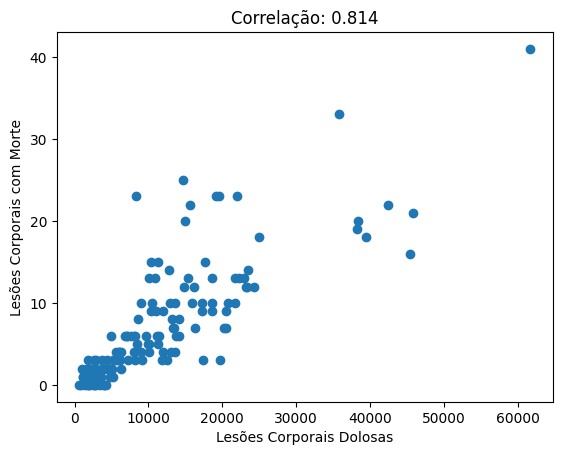

In [20]:
try:
    # gráfico de disperção
    print("Plotando gráfico de dispersão...")
    plt.scatter(df_total_lesoes['lesao_corp_dolosa'], df_total_lesoes['lesao_corp_morte'])
    plt.title(f'Correlação: {correlacao:.3f}')
    plt.xlabel('Lesões Corporais Dolosas')
    plt.ylabel('Lesões Corporais com Morte')
    plt.show()
    
except Exception as e:
    print(f"Erro ao plotar os dados: {e}")